# Proyecto Módulo Redes Convolucionales

**Daniela Ivon Zabala Donato**
> 20251695011



**Objetivo:**
Construir, entrenar y evaluar un modelo de visión que identifique objetos del entorno grabados por los estudiantes, utilizando redes convolucionales, autoencoders y clasificadores.

**Librerías para instalar**

Se instala Tensor Flow para implementar los algoritmos, imageio para leer las imágenes y la documentación de  TensorFlow

In [1]:
!pip install tensorflow-probability
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-uyspt8hr
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-uyspt8hr
  Resolved https://github.com/tensorflow/docs to commit f60f3439d8ab4392aaec1dda88ebfb28b5f7497b
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2025.10.13.34193-py3-none-any.whl size=187038 sha256=4223280a7072d4af5cfeff9e16e4339b807ab2be21a696fd787866506e9f287f
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_fhuni_/wheels/3e/88/34/48d2789bc9d37b33ddce06bccc454fae0285e5396d0a5be9d9
Successfully built tensorflow-docs


**Extraer los frames de todos los videos cargados en el GIT**

Se instala  un sistema de control de versiones

In [2]:
# instala subversion
!apt-get -qq update && apt-get -qq install subversion

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libapr1:amd64.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../0-libapr1_1.7.0-8ubuntu0.22.04.2_amd64.deb ...
Unpacking libapr1:amd64 (1.7.0-8ubuntu0.22.04.2) ...
Selecting previously unselected package libaprutil1:amd64.
Preparing to unpack .../1-libaprutil1_1.6.1-5ubuntu4.22.04.2_amd64.deb ...
Unpacking libaprutil1:amd64 (1.6.1-5ubuntu4.22.04.2) ...
Selecting previously unselected package libserf-1-1:amd64.
Preparing to unpack .../2-libserf-1-1_1.3.9-10ubuntu2_amd64.deb ...
Unpacking libserf-1-1:amd64 (1.3.9-10ubuntu2) ...
Selecting previously unselected package libutf8proc2:amd64.
Preparing to unpack .../3-libutf8proc2_2.7.0-3_amd64.deb ...
Unpacking libutf8proc2:amd64 (2.7.0-3) ...
Selecting previously unsele

**Importar los frames procesados en el entorno de trabajo clonando el repositorio**

In [3]:
# 1) Clonar el repositorio
!rm -rf objetos_salon
!git clone --no-checkout https://github.com/Gerardo-cursos/objetos_salon.git
%cd objetos_salon
!git sparse-checkout init --cone

# 2) Seleccionar únicamente las carpetas deseadas
!git sparse-checkout set processed/cpu processed/teclado processed/mouse processed/mesa processed/nada processed/pantalla processed/silla
!git checkout

# Verifica
!ls -lha processed
!ls -lha processed/cpu | head


Cloning into 'objetos_salon'...
remote: Enumerating objects: 2276, done.
remote: Counting objects: 100% (424/424), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 2276 (delta 174), reused 365 (delta 147), pack-reused 1852 (from 5)
Receiving objects: 100% (2276/2276), 1.23 GiB | 29.31 MiB/s, done.
Resolving deltas: 100% (436/436), done.
/content/objetos_salon
Updating files: 100% (1459/1459), done.
Your branch is up to date with 'origin/main'.
total 100K
drwxr-xr-x 9 root root 4.0K Oct 22 16:46 .
drwxr-xr-x 4 root root 4.0K Oct 22 16:46 ..
drwxr-xr-x 2 root root  12K Oct 22 16:46 cpu
drwxr-xr-x 2 root root  16K Oct 22 16:46 mesa
drwxr-xr-x 2 root root  12K Oct 22 16:46 mouse
drwxr-xr-x 2 root root  12K Oct 22 16:46 nada
drwxr-xr-x 2 root root  12K Oct 22 16:46 pantalla
-rw-r--r-- 1 root root    0 Oct 22 16:46 README.md
drwxr-xr-x 2 root root  16K Oct 22 16:46 silla
drwxr-xr-x 2 root root  12K Oct 22 16:46 teclado
total 109M
drwxr-xr-x 2 root root   12K Oct 22 16:4

**Explorar los datos disponibles**

In [4]:
import os
import pandas as pd

ROOT = "/content/objetos_salon/processed"

valid_ext = {".png", ".jpg", ".jpeg"}

rows = []
for sub in sorted(os.listdir(ROOT)):
    subdir = os.path.join(ROOT, sub)
    if not os.path.isdir(subdir):
        continue

    cnt_png = cnt_jpg = cnt_jpeg = 0
    for dirpath, _, files in os.walk(subdir):
        for f in files:
            ext = os.path.splitext(f)[1].lower()
            if ext == ".png":
                cnt_png += 1
            elif ext == ".jpg":
                cnt_jpg += 1
            elif ext == ".jpeg":
                cnt_jpeg += 1

    total = cnt_png + cnt_jpg + cnt_jpeg
    rows.append({
        "carpeta": sub,
        "png": cnt_png,
        "jpg": cnt_jpg,
        "jpeg": cnt_jpeg,
        "total": total
    })

df = pd.DataFrame(rows).sort_values("carpeta").reset_index(drop=True)
display(df)
print("Total global de imágenes (png/jpg/jpeg):", int(df["total"].sum()))


carpeta  png  jpg  jpeg  total
0       cpu  175   24     0    199
1      mesa  209   24     0    233
2     mouse  191   27     0    218
3      nada  119   24     0    143
4  pantalla  184   28     0    212
5     silla  210   22     0    232
6   teclado  188   25     0    213

Total global de imágenes (png/jpg/jpeg): 1450


**Mosaico de algunas de las imágenes disponibles**

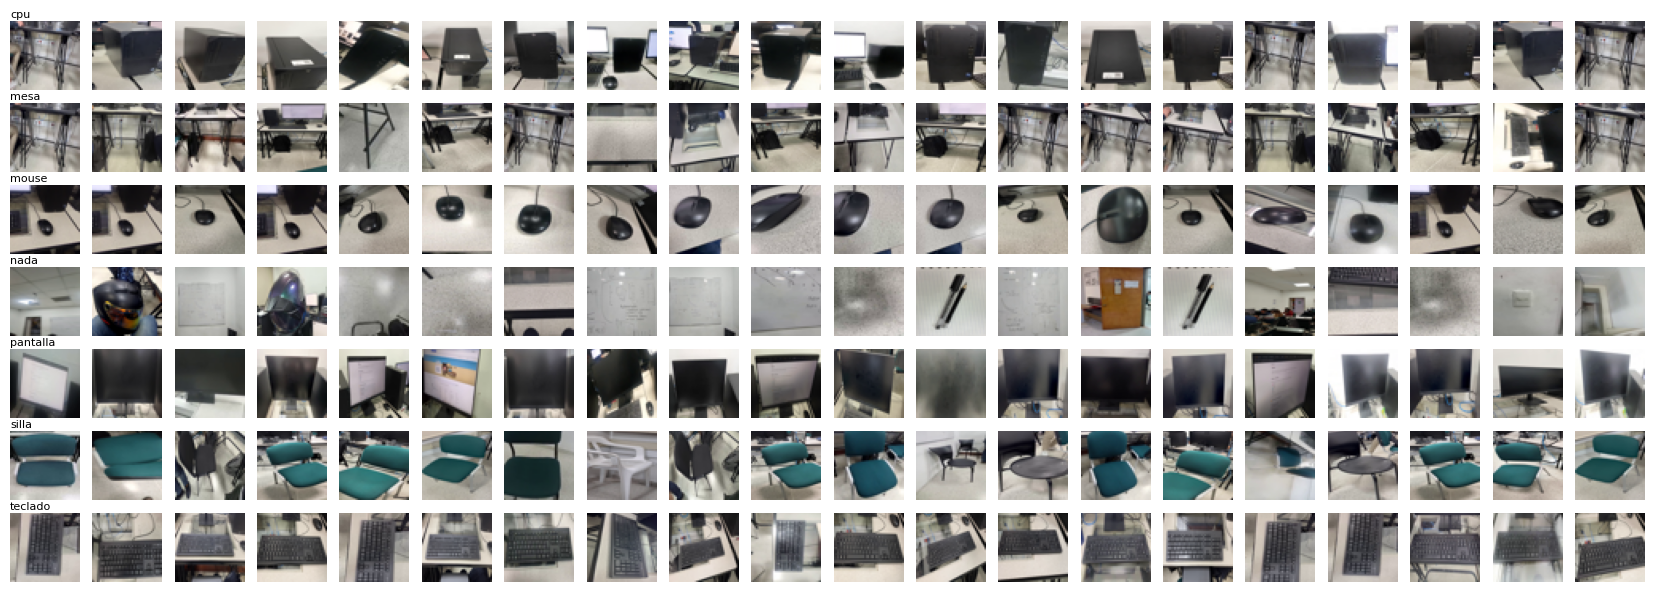

✅ Mosaico guardado en: /content/mosaico_dataset.png


In [5]:
# ==== MOSAICO DE MUESTRAS POR CLASE ====
import os, glob, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

ROOT = "/content/objetos_salon/processed"  # raíz con subcarpetas=clases
CLASES = sorted([d for d in os.listdir(ROOT) if os.path.isdir(os.path.join(ROOT,d))])

SAMPLES_PER_CLASS = 20     # <- cuántas imágenes por clase
TILE_SIZE = (44, 44)       # <- tamaño de cada miniatura (h, w)
RANDOM_SEED = 42

random.seed(RANDOM_SEED)

# Recolectar rutas por clase
paths_by_class = {}
for c in CLASES:
    exts = ("*.png", "*.jpg", "*.jpeg", "*.JPG", "*.JPEG", "*.PNG")
    files = []
    for e in exts:
        files += glob.glob(os.path.join(ROOT, c, e))
    if not files:
        print(f"⚠️  Sin imágenes en {c}")
    random.shuffle(files)
    paths_by_class[c] = files[:SAMPLES_PER_CLASS]

# Crear figura
rows = len(CLASES)
cols = max(len(v) for v in paths_by_class.values()) if CLASES else 0
fig_h = rows * (TILE_SIZE[0] / 64) * 1.2
fig_w = cols * (TILE_SIZE[1] / 64) * 1.2
plt.figure(figsize=(fig_w, fig_h))

# Dibujar grid
for r, c_name in enumerate(CLASES):
    row_paths = paths_by_class[c_name]
    for ci in range(cols):
        ax = plt.subplot(rows, cols, r*cols + ci + 1)
        ax.axis("off")
        if ci < len(row_paths):
            p = row_paths[ci]
            try:
                img = Image.open(p).convert("RGB").resize((TILE_SIZE[1], TILE_SIZE[0]))
                ax.imshow(img)
            except Exception as e:
                ax.imshow(np.zeros((TILE_SIZE[0], TILE_SIZE[1], 3), dtype=np.uint8))
        # rotular la clase en la primera columna
        if ci == 0:
            ax.set_title(c_name, fontsize=8, loc="left", pad=2)

plt.tight_layout(pad=0.2)
out_path = "/content/mosaico_dataset.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()
print("✅ Mosaico guardado en:", out_path)


**Se configuran los datos para empezar a implementar los algoritmos**

Asegurar que se asigna la clase a cada imagen segun la carpeta en la que se encuentra

Found 1450 files belonging to 7 classes.
Using 1160 files for training.
Found 1450 files belonging to 7 classes.
Using 290 files for validation.
Clases: ['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']
{0: 'cpu', 1: 'mesa', 2: 'mouse', 3: 'nada', 4: 'pantalla', 5: 'silla', 6: 'teclado'}
Etiquetas del batch: ['cpu', 'mouse', 'mesa', 'mouse', 'teclado', 'pantalla', 'cpu', 'nada', 'silla', 'mouse', 'mouse', 'teclado', 'mesa', 'cpu', 'cpu', 'pantalla']


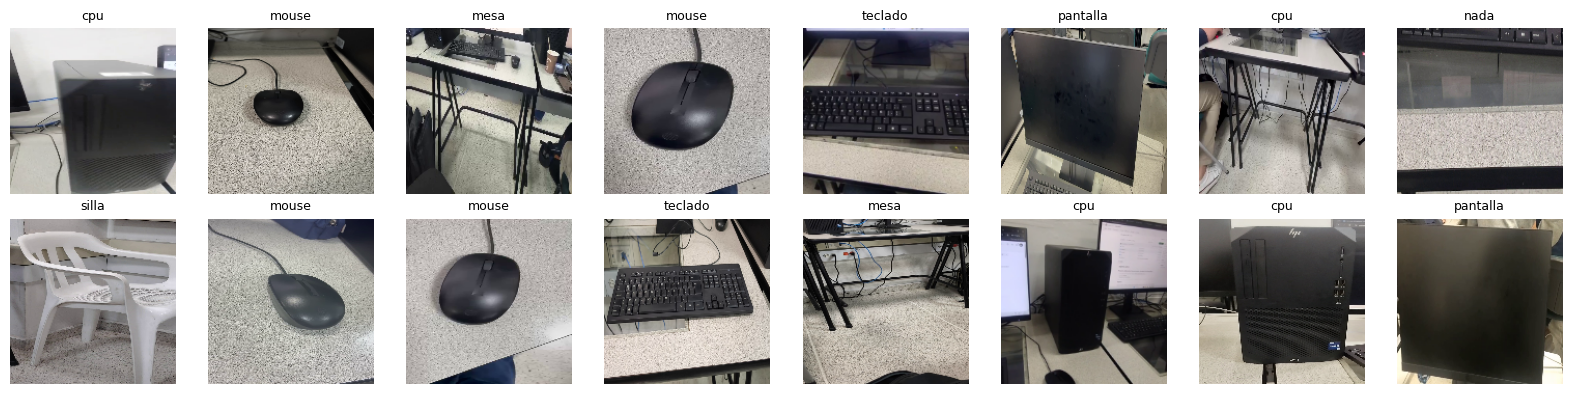

In [6]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import math

ROOT = Path("/content/objetos_salon/processed")
IMG_SIZE = (160, 160)
BATCH    = 32
SEED     = 42

# Crear datasets de entranmiento y prueba
train_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=0.2, subset="training"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=0.2, subset="validation"
)

# >>> Guardar los nombres ANTES de cache/prefetch
class_names = train_ds.class_names
print("Clases:", class_names)

# Pipeline de rendimiento
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# mapa índice->clase para decodificar labels luego
int_to_label = dict(enumerate(class_names))
print(int_to_label)

# ver etiquetas + miniaturas del primer batch
for X, y in train_ds.take(1):
    # mostrar primeras N imágenes del batch
    N = min(16, X.shape[0])
    cols = 8
    rows = math.ceil(N / cols)
    plt.figure(figsize=(cols*2, rows*2))
    names = [int_to_label[int(t)] for t in y[:N].numpy()]
    print("Etiquetas del batch:", names)

    for i in range(N):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(X[i].numpy().astype("uint8"))  # el dataset ya viene en [0..255]
        ax.set_title(names[i], fontsize=9)
        ax.axis("off")
    plt.tight_layout()
    plt.show()


# Aplicar Tensor Flow

Los parámetros elegidos son:


> Tamaño de las imagenes de 160x160, validación con el 20% de los datos, latencia de 128, epocas de entrenamiento para el autoencoder 25 y para el clasificador 15.





In [7]:
import os, glob, math, numpy as np, tensorflow as tf
from pathlib import Path

# ===== Config =====
ROOT = Path("/content/objetos_salon/processed")  # raíz con subcarpetas = clases
IMG_SIZE = (160, 160)    # subir a 160/192/224 si su GPU/tiempo lo permite
BATCH    = 32
SEED     = 42
VAL_SPLIT = 0.2          # 80/20
LATENT_DIM = 128
EPOCHS_AE = 25           # autoencoder
EPOCHS_CLS = 15          # clasificador

print(tf.__version__)
tf.random.set_seed(SEED)

# Carga dataset con clases inferidas por carpeta
train_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=VAL_SPLIT, subset="training"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=VAL_SPLIT, subset="validation"
)

class_names = train_ds.class_names
num_classes = len(class_names)
class_names


2.19.0
Found 1450 files belonging to 7 classes.
Using 1160 files for training.
Found 1450 files belonging to 7 classes.
Using 290 files for validation.


['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']

In [8]:
# Pipeline de rendimiento + normalización [0,1]
AUTOTUNE = tf.data.AUTOTUNE

def norm(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    return x, y

train_ds = train_ds.map(norm).cache().shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds   = val_ds.map(norm).cache().prefetch(AUTOTUNE)


In [9]:
import cv2

def extract_k_frames(video_path, out_dir, k=10):
    """Extrae k frames equiespaciados del video."""
    os.makedirs(out_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    idxs = np.unique(np.linspace(0, max(0, total-1), k, dtype=int))
    saved = 0
    for i, idx in enumerate(idxs, 1):
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(idx))
        ok, frame = cap.read()
        if not ok or frame is None:
            continue
        out = os.path.join(out_dir, f"frame_{i:03d}.jpg")
        cv2.imwrite(out, frame, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
        saved += 1
    cap.release()
    return saved

def predict_video_majority(model, video_path, img_size=IMG_SIZE, k=12):
    """Extrae k frames, predice cada uno, y hace voto mayoritario."""
    tmp = "/content/tmp_frames_eval"
    if os.path.exists(tmp):
        for f in glob.glob(os.path.join(tmp, "*.*")):
            os.remove(f)
    else:
        os.makedirs(tmp, exist_ok=True)
    _ = extract_k_frames(video_path, tmp, k=k)
    paths = sorted(glob.glob(os.path.join(tmp, "*.jpg")))
    if not paths:
        return None, []
    imgs = []
    for p in paths:
        img = tf.keras.utils.load_img(p, target_size=img_size)
        x = tf.keras.utils.img_to_array(img)[None,...] / 255.0
        imgs.append(x)
    X = np.vstack(imgs)
    preds = model.predict(X, verbose=0)
    labels = np.argmax(preds, axis=1)
    # voto mayoritario
    values, counts = np.unique(labels, return_counts=True)
    pred_label = int(values[np.argmax(counts)])
    return class_names[pred_label], labels


In [10]:
from tensorflow.keras import layers, models

def build_autoencoder(img_size=IMG_SIZE, latent_dim=LATENT_DIM):
    h, w = img_size
    downsamples = 4  # número de MaxPooling2D que haces
    sh, sw = h // (2**downsamples), w // (2**downsamples)  # tamaño espacial tras los pools

    assert h % (2**downsamples) == 0 and w % (2**downsamples) == 0, \
        f"IMG_SIZE debe ser múltiplo de {2**downsamples}. Recibí {img_size}"

    inp = layers.Input(shape=(h, w, 3))

    # ----- Encoder -----
    x = layers.Conv2D(32,  3, padding='same', activation='relu')(inp)
    x = layers.MaxPooling2D()(x)   # /2
    x = layers.Conv2D(64,  3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)   # /4
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)   # /8
    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)   # /16  → (sh, sw, 256)

    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, name="latent")(x)

    # ----- Decoder (simétrico) -----
    x = layers.Dense(sh * sw * 256)(latent)
    x = layers.Reshape((sh, sw, 256))(x)
    x = layers.Conv2DTranspose(256, 3, strides=2, padding='same', activation='relu')(x)  # ×2
    x = layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')(x)  # ×4
    x = layers.Conv2DTranspose(64,  3, strides=2, padding='same', activation='relu')(x)  # ×8
    x = layers.Conv2DTranspose(32,  3, strides=2, padding='same', activation='relu')(x)  # ×16 → (h, w)
    out = layers.Conv2D(3, 3, padding='same', activation='sigmoid')(x)

    ae  = models.Model(inp, out, name="autoencoder")
    enc = models.Model(inp, latent, name="encoder")
    return ae, enc


ae, encoder = build_autoencoder()
ae.compile(optimizer='adam', loss='mse')
ae.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25600)          │     3,302,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 20, 20, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 40, 40, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 80, 80, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 160, 160, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,945,987 (30.31 MB)

 Trainable params: 7,945,987 (30.31 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Convertir datasets etiquetados -> solo imágenes para el AE
def ds_images_only(ds):
    return ds.map(lambda x, y: (x, x))

train_ae = ds_images_only(train_ds)
val_ae   = ds_images_only(val_ds)

cb = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
]
history_ae = ae.fit(train_ae, validation_data=val_ae, epochs=EPOCHS_AE, callbacks=cb)


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - loss: 0.0713 - val_loss: 0.0659
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - loss: 0.0576 - val_loss: 0.0449
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - loss: 0.0388 - val_loss: 0.0312
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - loss: 0.0288 - val_loss: 0.0259
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 208s 6s/step - loss: 0.0238 - val_loss: 0.0223
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - loss: 0.0208 - val_loss: 0.0202
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - loss: 0.0187 - val_loss: 0.0189
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - loss: 0.0175 - val_loss: 0.0178
Epoch 9/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - loss: 0.0160 - val_loss: 0.0171
Epoch 10/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - loss: 0.0143 - val_loss: 0.0164
Epoch 11/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - loss: 0.0144 - val_loss: 0.0157
Epoch 12/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - loss: 0.0

In [12]:
# Congelar encoder para usarlo como extractor de características
encoder.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = layers.Lambda(lambda t: t)(inputs)  # identidad (place-holder)
x = encoder(x)                           # -> latent_dim
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

clf = tf.keras.Model(inputs, outputs, name="encoder_linear_head")
clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
clf.summary()


Model: "encoder_linear_head"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 128)            │     3,665,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,683,271 (14.05 MB)

 Trainable params: 17,671 (69.03 KB)

 Non-trainable params: 3,665,600 (13.98 MB)

In [13]:
augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="augment")

def add_aug_and_norm(x, y):
    x = augment(x, training=True)
    return x, y

train_cls = train_ds.map(add_aug_and_norm).prefetch(tf.data.AUTOTUNE)
val_cls   = val_ds

cb_cls = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy"),
]
hist_cls = clf.fit(train_cls, validation_data=val_cls, epochs=EPOCHS_CLS, callbacks=cb_cls)


Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 880ms/step - accuracy: 0.2243 - loss: 2.1730 - val_accuracy: 0.5069 - val_loss: 1.4026
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 845ms/step - accuracy: 0.4932 - loss: 1.4375 - val_accuracy: 0.6759 - val_loss: 1.0422
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 839ms/step - accuracy: 0.5996 - loss: 1.1598 - val_accuracy: 0.7586 - val_loss: 0.8484
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 842ms/step - accuracy: 0.6547 - loss: 1.0346 - val_accuracy: 0.7793 - val_loss: 0.7264
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 875ms/step - accuracy: 0.6765 - loss: 0.9883 - val_accuracy: 0.8103 - val_loss: 0.6284
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 838ms/step - accuracy: 0.7147 - loss: 0.8641 - val_accuracy: 0.8276 - val_loss: 0.5578
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 834ms/step - accuracy: 0.7296 - loss: 0.8183 - val_accuracy: 0.8345 - val_loss: 0.5249
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 869ms/step - accuracy: 0.7527 - loss: 0.7899 - val_accu

In [14]:
val_loss, val_acc = clf.evaluate(val_ds, verbose=0)
score = val_acc / LATENT_DIM
print(f"Accuracy validación = {val_acc:.4f}")
print(f"LATENT_DIM = {LATENT_DIM}")


Accuracy validación = 0.8828
LATENT_DIM = 128


In [15]:
def build_cnn(img_size=IMG_SIZE, num_classes=7):
    inp = layers.Input(shape=(img_size[0], img_size[1], 3))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    m = tf.keras.Model(inp, out, name="simple_cnn")
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

cnn = build_cnn(IMG_SIZE, num_classes)
hist_end2end = cnn.fit(train_cls, validation_data=val_cls, epochs=EPOCHS_CLS, callbacks=cb_cls)
val_loss2, val_acc2 = cnn.evaluate(val_ds, verbose=0)
print(f"[CNN simple] Acc val = {val_acc2:.4f}")


Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.1513 - loss: 1.9377 - val_accuracy: 0.2276 - val_loss: 1.8907
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2744 - loss: 1.8674 - val_accuracy: 0.3828 - val_loss: 1.6528
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3798 - loss: 1.6296 - val_accuracy: 0.4483 - val_loss: 1.4704
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.4473 - loss: 1.4503 - val_accuracy: 0.4345 - val_loss: 1.5029
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5164 - loss: 1.3192 - val_accuracy: 0.4517 - val_loss: 1.4337
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5507 - loss: 1.2132 - val_accuracy: 0.4931 - val_loss: 1.2426
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5740 - loss: 1.1369 - val_accuracy: 0.4828 - val_loss: 1.4533
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5872 - loss: 1.1307 - val_accuracy: 0.5414 - val_loss:

In [21]:
ae.save("/content/autoencoder.h5")
encoder.save("/content/encoder.h5")
clf.save("/content/clasificador_encoder_head.h5")

with open("/content/metricas.txt","w") as f:
    f.write(f"val_acc={val_acc:.6f}\n")
    f.write(f"latent_dim={LATENT_DIM}\n")
    f.write(f"nota= {val_acc/LATENT_DIM:.8f}\n")

print("Modelos y métricas guardados en /content/")


Modelos y métricas guardados en /content/


Gráficas de algunas de las predicciones

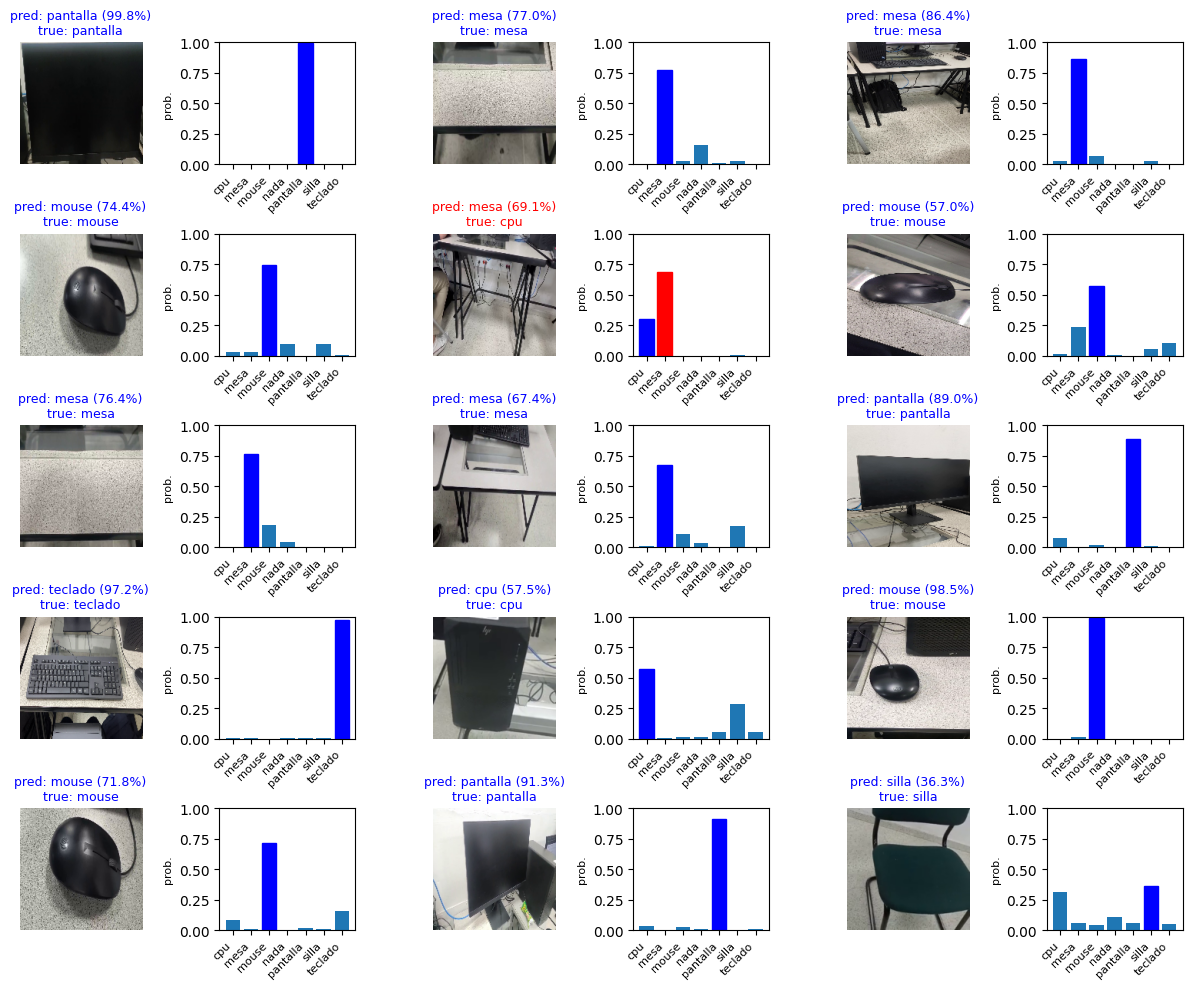

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- helpers de ploteo ----------
def plot_image(ax, img, true_label, pred_probs, class_names):
    """Muestra la imagen y etiqueta predicha vs verdadera (azul=correcta, rojo=incorrecta)."""
    pred_label = int(np.argmax(pred_probs))
    confidence = 100.0 * float(np.max(pred_probs))
    color = 'blue' if pred_label == int(true_label) else 'red'

    ax.imshow(img)
    ax.set_title(
        f"pred: {class_names[pred_label]} ({confidence:.1f}%)\ntrue: {class_names[int(true_label)]}",
        color=color, fontsize=9
    )
    ax.axis('off')

def plot_value_array(ax, pred_probs, true_label, class_names):
    """Barras de probabilidades por clase."""
    ax.bar(range(len(class_names)), pred_probs)
    ax.set_ylim([0, 1])
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=8)
    ax.axhline(0, linewidth=0, color='k')
    ax.set_ylabel("prob.", fontsize=8)
    pred_label = int(np.argmax(pred_probs))
    ax.get_children()[pred_label].set_color('red')
    ax.get_children()[int(true_label)].set_color('blue')

# ---------- toma N imágenes del conjunto de validación ----------
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

# Desempaquetamos val_ds y armamos un batch del tamaño deseado
X_sample, y_sample = next(iter(val_ds.unbatch().batch(num_images)))
X_np = X_sample.numpy()
y_np = y_sample.numpy()

# Predicciones del modelo (clf debe estar definido/entrenado)
pred_probs = clf.predict(X_sample, verbose=0)  # shape: (num_images, num_classes)

# ---------- figure tipo "imagen + barras" ----------
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    # imagen
    ax_img = plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(ax_img, X_np[i], y_np[i], pred_probs[i], class_names)

    # barras
    ax_bar = plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(ax_bar, pred_probs[i], y_np[i], class_names)

plt.tight_layout()
plt.show()


Found 1450 files belonging to 7 classes.
Using 290 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
⚙️ Error cuadrático medio (MSE) en validación: 0.015545


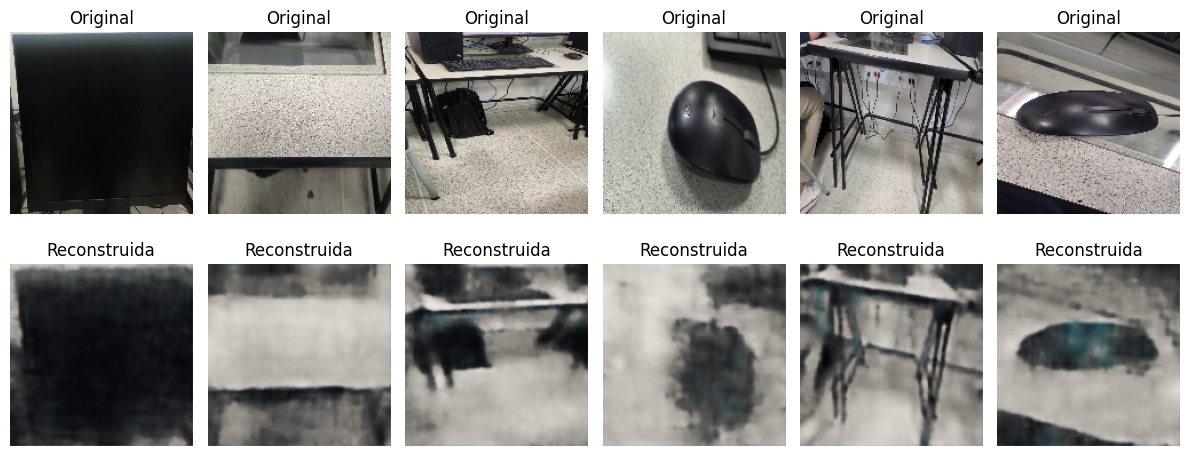

In [26]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt

# === 1. Configuración ===
ROOT = Path("/content/objetos_salon/processed")
IMG_SIZE = (160, 160)
BATCH = 32
SEED = 42
VAL_SPLIT = 0.2

# === 2. Dataset de validación ===
val_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=VAL_SPLIT, subset="validation"
)
class_names = val_ds.class_names
AUTOTUNE = tf.data.AUTOTUNE
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y)).cache().prefetch(AUTOTUNE)

# === 3. Cargar modelo de Autoencoder ===
def load_keras_model(path):
    try:
        m = tf.keras.models.load_model(path, compile=False)
    except Exception as e:
        print(f"Reintentando con custom_objects por: {e}")
        m = tf.keras.models.load_model(
            path, compile=False,
            custom_objects={'mse': tf.keras.losses.MeanSquaredError()}
        )
    return m

ae = load_keras_model("/content/autoencoder.h5")
ae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# === 4. Evaluar reconstrucción ===
val_imgs, _ = next(iter(val_ds.take(1)))  # batch de prueba
reconstructed = ae.predict(val_imgs)

# ✅ Calcular el MSE manualmente
mse = tf.reduce_mean(tf.square(val_imgs - reconstructed))
print(f"⚙️ Error cuadrático medio (MSE) en validación: {mse.numpy():.6f}")

# === 5. Visualizar reconstrucciones ===
n = 6
plt.figure(figsize=(12, 5))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(val_imgs[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i])
    plt.title("Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [24]:
import tensorflow as tf

# --- 1) (Re)crear val_ds con el MISMO IMG_SIZE del entrenamiento original ---
from pathlib import Path
ROOT = Path("/content/objetos_salon/processed")
IMG_SIZE = (160,160)            # <-- usa el tamaño correcto
BATCH    = 32
SEED     = 42
VAL_SPLIT = 0.2

val_ds = tf.keras.utils.image_dataset_from_directory(
    ROOT, labels="inferred", label_mode="int",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=VAL_SPLIT, subset="validation"
)
class_names = val_ds.class_names
AUTOTUNE = tf.data.AUTOTUNE
val_ds = val_ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y)).cache().prefetch(AUTOTUNE)

# --- 2) Función de carga robusta (.h5) ---
def load_keras_model(path):
    try:
        # intenta cargar sin compilar (evita problemas de pérdidas serializadas)
        m = tf.keras.models.load_model(path, compile=False)
    except Exception as e:
        print(f"Reintentando con custom_objects por: {e}")
        m = tf.keras.models.load_model(
            path, compile=False,
            custom_objects={'mse': tf.keras.losses.MeanSquaredError()}
        )
    return m

# --- 3) Cargar modelos ---
clf = load_keras_model("/content/clasificador_encoder_head.h5")
encoder = load_keras_model("/content/encoder.h5")
ae = load_keras_model("/content/autoencoder.h5")

# --- 4) Compilar donde aplique ---
clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# --- 5) Evaluar ---
val_loss, val_acc = clf.evaluate(val_ds, verbose=0)
print(f"✅ Accuracy validación (modelo cargado) = {val_acc:.4f}")


Found 1450 files belonging to 7 classes.
Using 290 files for validation.
✅ Accuracy validación (modelo cargado) = 0.8828


In [28]:
!ls -lh "/content/drive/MyDrive/Universidad/Big Data/videos/"


ls: cannot access '/content/drive/MyDrive/Universidad/Big Data/videos/': No such file or directory


Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
📊 Resultados promedio sobre 12 frames:
⚙️ MSE  = 0.011719
🔹 PSNR = 19.48 dB
🔹 SSIM = 0.4228


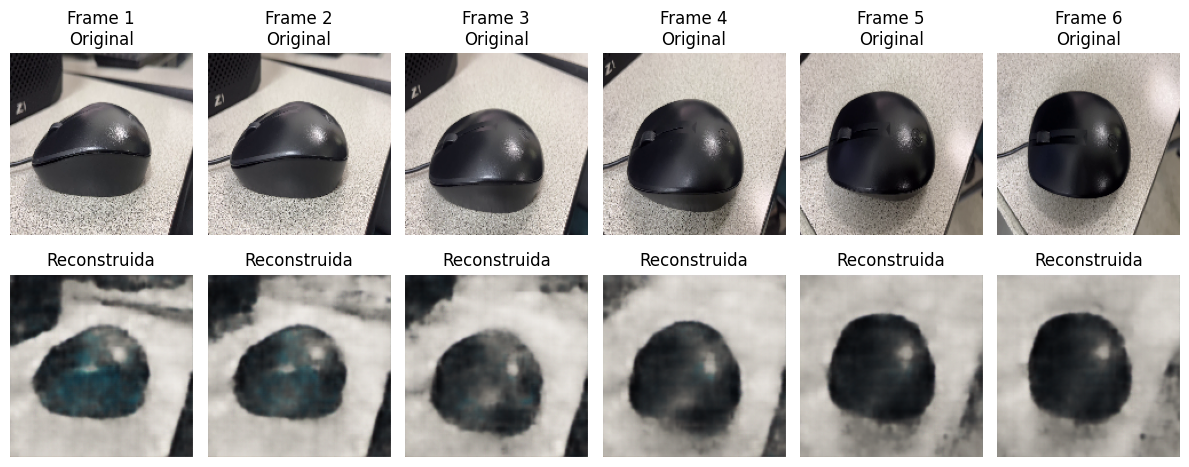

In [29]:
import os, glob, cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# === 1. Cargar modelo AE ===
def load_keras_model(path):
    try:
        m = tf.keras.models.load_model(path, compile=False)
    except Exception as e:
        print(f"Reintentando con custom_objects por: {e}")
        m = tf.keras.models.load_model(
            path, compile=False,
            custom_objects={'mse': tf.keras.losses.MeanSquaredError()}
        )
    return m

ae = load_keras_model("/content/autoencoder.h5")
ae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

IMG_SIZE = (160, 160)  # mismo tamaño del entrenamiento

# === 2. Función para extraer frames ===
def extract_k_frames(video_path, k=12):
    """Extrae k frames equiespaciados del video."""
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    idxs = np.unique(np.linspace(0, max(0, total-1), k, dtype=int))
    frames = []
    for idx in idxs:
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(idx))
        ok, frame = cap.read()
        if not ok or frame is None:
            continue
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, IMG_SIZE)
        frames.append(frame.astype(np.float32) / 255.0)
    cap.release()
    return np.stack(frames) if frames else None

# === 3. Extraer y reconstruir ===
video_path = "/content/drive/MyDrive/Universidad/Big Data/videos/20251695011_mouse.mp4"
frames = extract_k_frames(video_path, k=12)

if frames is None or len(frames) == 0:
    print("⚠️ No se pudieron extraer frames del video.")
else:
    reconstructed = ae.predict(frames)

    # === 4. Calcular métricas ===
    mse = tf.reduce_mean(tf.square(frames - reconstructed))
    psnr = tf.image.psnr(frames, reconstructed, max_val=1.0)
    ssim = tf.image.ssim(frames, reconstructed, max_val=1.0)

    print(f"📊 Resultados promedio sobre {len(frames)} frames:")
    print(f"⚙️ MSE  = {mse.numpy():.6f}")
    print(f"🔹 PSNR = {tf.reduce_mean(psnr).numpy():.2f} dB")
    print(f"🔹 SSIM = {tf.reduce_mean(ssim).numpy():.4f}")

    # === 5. Visualizar comparaciones ===
    n = min(6, len(frames))
    plt.figure(figsize=(12, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(frames[i])
        plt.title(f"Frame {i+1}\nOriginal")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstruida")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Clases: ['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']


📹 Video: 20251695011_mouse.mp4
🧮 Frames analizados: 12
📦 Conteo por clase (voto duro):
  - mouse: 12
🏷️ Predicción (voto mayoritario): mouse
🏷️ Predicción (promedio de probabilidades): mouse  (conf: 85.69%)


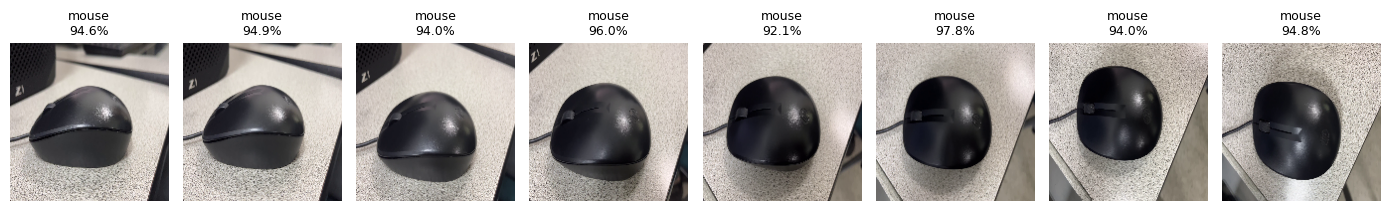

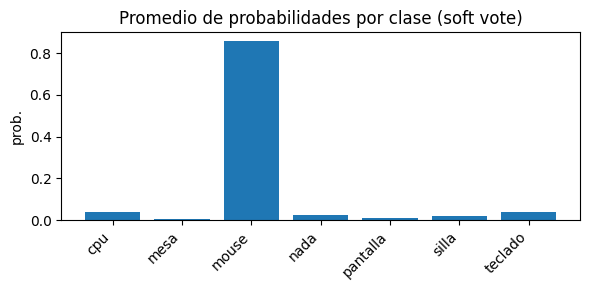

In [30]:
import os, glob, cv2, json, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from google.colab import drive

# === 0. Montar Drive si hace falta ===
drive.mount('/content/drive')

# === 1. Configuración  ===
IMG_SIZE = (160, 160)
ROOT = Path("/content/objetos_salon/processed")
VIDEO_PATH = "/content/drive/MyDrive/Universidad/Big Data/videos/20251695011_mouse.mp4"
K_FRAMES = 12

# === 2. Cargar class_names ===
CLASS_JSON = "/content/class_names.json"
if os.path.exists(CLASS_JSON):
    with open(CLASS_JSON) as f:
        class_names = json.load(f)
else:

    class_names = sorted([d for d in os.listdir(ROOT) if os.path.isdir(ROOT/d)])
print("Clases:", class_names)

# === 3. Cargar clasificador entrenado ===
def load_keras_model(path):
    # Carga sin compilar (más robusto con .h5) y compilamos manualmente
    m = tf.keras.models.load_model(path, compile=False)
    return m

clf = load_keras_model("/content/clasificador_encoder_head.h5")
clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === 4. Función para extraer frames ===
def extract_k_frames(video_path, k=12):
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if not cap.isOpened() or total <= 0:
        cap.release()
        return None
    idxs = np.unique(np.linspace(0, max(0, total-1), k, dtype=int))
    frames_rgb = []
    for idx in idxs:
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(idx))
        ok, frame = cap.read()
        if not ok or frame is None:
            continue
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, IMG_SIZE)
        frames_rgb.append(frame.astype(np.float32) / 255.0)  # normalizar como en entrenamiento
    cap.release()
    return np.stack(frames_rgb) if frames_rgb else None

# === 5. Extraer frames y predecir ===
frames = extract_k_frames(VIDEO_PATH, k=K_FRAMES)
if frames is None or len(frames) == 0:
    print("⚠️ No se pudieron extraer frames del video. Revisa la ruta y que Drive esté montado.")
else:
    # Predicciones por frame
    probs = clf.predict(frames, verbose=0)              # (k, num_classes)
    hard_labels = np.argmax(probs, axis=1)              # etiqueta por frame
    # Voto mayoritario (hard vote)
    unique, counts = np.unique(hard_labels, return_counts=True)
    majority_idx = int(unique[np.argmax(counts)])
    majority_class = class_names[majority_idx]
    # Promedio de probabilidades (soft vote)
    mean_probs = probs.mean(axis=0)
    mean_idx = int(np.argmax(mean_probs))
    mean_class = class_names[mean_idx]
    mean_conf = float(mean_probs[mean_idx])

    # === 6. Reporte ===
    print(f"📹 Video: {os.path.basename(VIDEO_PATH)}")
    print(f"🧮 Frames analizados: {len(frames)}")
    print("📦 Conteo por clase (voto duro):")
    for c_idx, c_count in sorted(zip(unique, counts), key=lambda t: -t[1]):
        print(f"  - {class_names[int(c_idx)]}: {int(c_count)}")
    print(f"🏷️ Predicción (voto mayoritario): {majority_class}")
    print(f"🏷️ Predicción (promedio de probabilidades): {mean_class}  (conf: {mean_conf:.2%})")

    # === 7. Visualizar algunas miniaturas con la predicción por frame ===
    n = min(8, len(frames))
    plt.figure(figsize=(14, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        ax.imshow(frames[i])
        pi = probs[i]
        lab_i = int(np.argmax(pi))
        conf_i = float(np.max(pi))
        ax.set_title(f"{class_names[lab_i]}\n{conf_i:.1%}", fontsize=9)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

    # === 8. Gráfico de barras del promedio de probabilidades ===
    plt.figure(figsize=(6,3))
    plt.bar(range(len(class_names)), mean_probs)
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.ylabel("prob.")
    plt.title("Promedio de probabilidades por clase (soft vote)")
    plt.tight_layout()
    plt.show()
